In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/Data-attendance"
DATA_DIR = "/content/drive/MyDrive/Data-attendance"

1-Aug19-20251120_152147.jpg  20251120_152432.jpg  20251120_152524.jpg
20251120_152301.jpg	     20251120_152438.jpg  20251120_152537.jpg
20251120_152311.jpg	     20251120_152443.jpg  20251120_152543.jpg
20251120_152325.jpg	     20251120_152448.jpg  20251120_152548.jpg
20251120_152334.jpg	     20251120_152454.jpg  20251120_152555.jpg
20251120_152345.jpg	     20251120_152501.jpg  20251120_152601.jpg
20251120_152352.jpg	     20251120_152507.jpg  Nov13-20251118_094251.jpg
20251120_152414.jpg	     20251120_152511.jpg  Nov18-20251120_151854.jpg
20251120_152427.jpg	     20251120_152517.jpg  Nov20-20251201_111344.jpg


# NOTE:
I attempted to use MiniCPM-V-4_5, LlaVa through huggingface transformers library, and finally GPT-4o through the OpenAI API.  

MiniCPM-V-4_5: was not able to prompt the model  

LlaVa: Ran out of GPU resources (it used 22GB of RAM which maxed out the L4, the paid GPU through student account) I attempted to remedy this by quantizing the images using bitsandbytes, but both attempts failed to run with the error that the library on this runtime was not the latest version, despite trying to manually update it here.  

GPT-4o: It said I hit the API limit despite it only being 27 images

I removed the code for MiniCPM and LlaVa as I was trying to switch to GPT, but since that is not working either, I have decided to leave the code in to show there was an attempt.

Due to the time constraints, I am resorting to prompting GPT directly using their interface.


### (Tried to use) GPT-4o to extract the data, left in for reference/documentation

In [6]:
from openai import OpenAI
import os
from google.colab import userdata
import base64


In [9]:
api_key = userdata.get('openaiapi')
client = OpenAI(api_key= api_key)

for fname in os.listdir(DATA_DIR):
    path = os.path.join(DATA_DIR, fname)
    with open(path, "rb") as image_file:
      base64_image = base64.b64encode(image_file.read()).decode('utf-8')
      response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": "extract a csv file with name, username, attendance index number, and the class number and date for this attendance sheet?"},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
            ]
        }],
        max_tokens=1000
    )
    result = response.choices[0].message.content
    print(fname, result)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# Analyzing the CSV data from prompting GPT directly

#### Note: Class 23 is missing, and Class 25 had duplicate images

In [10]:
!ls "/content/drive/MyDrive/attendance_csv"
DATA_DIR = "/content/drive/MyDrive/attendance_csv"

Class10_Attendance_18Sep2025.csv  Class22_Attendance_4Nov2025.csv
Class11_Attendance_28Sep2025.csv  Class24_Attendance_11Nov2025.csv
Class12_Attendance_25Sep2025.csv  Class25_Attendance_13Nov2025.csv
Class13_Attendance_30Sep2025.csv  Class26_Attendance_18Nov2025.csv
Class14_Attendance_2Oct2025.csv   Class27_Attendance_20Nov2025.csv
Class15_Attendance_7Oct2025.csv   Class2_Attendance_21Aug2025.csv
Class16_Attendance_14Oct2025.csv  Class3_Attendance_26Aug2025.csv
Class17_Attendance_16Oct2025.csv  Class4_Attendance_28Aug2025.csv
Class18_Attendance_21Oct2025.csv  Class5_Attendance_2Sep2025.csv
Class19_Attendance_23Oct2025.csv  Class6_Attendance_4Sep2025.csv
Class1_Attendance_19Aug2025.csv   Class7_Attendance_9Sep2025.csv
Class20_Attendance_28Oct2025.csv  Class8_Attendance_11Sep2025.csv
Class21_Attendance_30Oct2025.csv  Class9_Attendance_16Sep2025.csv


In [ ]:
import pandas as pd
import glob
csv_files = glob.glob("/content/drive/MyDrive/attendance_csv/*.csv")

# combine all the csvs into one file
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [13]:
print(combined_df.head())

                    Name  Username  Attendance Index Number Class Number  \
0            Eli Hatcher     kh155                        1      Class 7   
1    Aashish Jayapoorvam  aashishj                        2      Class 7   
2      Divyachamee Swain   dswain4                        3      Class 7   
3  Suprawee Pongeerodech  suprawee                        4      Class 7   
4         Yamuna Bobbala  Ybobbala                        5      Class 7   

   Class Date  
0  9 Sep 2025  
1  9 Sep 2025  
2  9 Sep 2025  
3  9 Sep 2025  
4  9 Sep 2025  


In [20]:
# Cleaning the data
# Check for duplicates
print("\nDuplicate rows:", combined_df.duplicated().sum())

# Check for empty/whitespace values
print("\nRows with empty names:", (combined_df['Name'].str.strip() == '').sum())

# Check date formatting
print("\nDate format examples:")
print(combined_df['Class Date'].value_counts())


Duplicate rows: 0

Rows with empty names: 0

Date format examples:
Class Date
21 Aug 2025    49
26 Aug 2025    45
7 Oct 2025     45
19 Aug 2025    44
9 Sep 2025     42
4 Sep 2025     40
2 Sep 2025     40
11 Nov 2025    39
28 Sep 2025    38
25 Sep 2025    35
11 Sep 2025    34
18 Nov 2025    34
16 Sep 2025    33
21 Oct 2025    33
30 Sep 2025    33
23 Oct 2025    32
18 Sep 2025    31
28 Aug 2025    30
2 Oct 2025     29
16 Oct 2025    28
14 Oct 2025    27
4 Nov 2025     27
28 Oct 2025    25
30 Oct 2025    22
13 Nov 2025    19
20 Nov 2025    14
Name: count, dtype: int64


In [22]:
# Convert to datetime format for consistency
combined_df['Class Date'] = pd.to_datetime(combined_df['Class Date'], format = '%d %b %Y')
combined_df = combined_df.sort_values('Class Date')

In [25]:
# Check the dates
print(combined_df['Class Date'].sort_values().unique())

<DatetimeArray>
['2025-08-19 00:00:00', '2025-08-21 00:00:00', '2025-08-26 00:00:00',
 '2025-08-28 00:00:00', '2025-09-02 00:00:00', '2025-09-04 00:00:00',
 '2025-09-09 00:00:00', '2025-09-11 00:00:00', '2025-09-16 00:00:00',
 '2025-09-18 00:00:00', '2025-09-25 00:00:00', '2025-09-28 00:00:00',
 '2025-09-30 00:00:00', '2025-10-02 00:00:00', '2025-10-07 00:00:00',
 '2025-10-14 00:00:00', '2025-10-16 00:00:00', '2025-10-21 00:00:00',
 '2025-10-23 00:00:00', '2025-10-28 00:00:00', '2025-10-30 00:00:00',
 '2025-11-04 00:00:00', '2025-11-11 00:00:00', '2025-11-13 00:00:00',
 '2025-11-18 00:00:00', '2025-11-20 00:00:00']
Length: 26, dtype: datetime64[ns]


# Q2c on attendance data: a,b,c,d

In [27]:
# a) number of classes and their dates
class_dates = combined_df.groupby(['Class Number', 'Class Date']).size().reset_index(name='Count')
print(f"Total number of classes: {len(class_dates)}")

print(class_dates.sort_values('Class Date'))

Total number of classes: 26
   Class Number Class Date  Count
0       Class 1 2025-08-19     44
11      Class 2 2025-08-21     49
19      Class 3 2025-08-26     45
20      Class 4 2025-08-28     30
21      Class 5 2025-09-02     40
22      Class 6 2025-09-04     40
23      Class 7 2025-09-09     42
24      Class 8 2025-09-11     34
25      Class 9 2025-09-16     33
1      Class 10 2025-09-18     31
3      Class 12 2025-09-25     35
2      Class 11 2025-09-28     38
4      Class 13 2025-09-30     33
5      Class 14 2025-10-02     29
6      Class 15 2025-10-07     45
7      Class 16 2025-10-14     27
8      Class 17 2025-10-16     28
9      Class 18 2025-10-21     33
10     Class 19 2025-10-23     32
12     Class 20 2025-10-28     25
13     Class 21 2025-10-30     22
14     Class 22 2025-11-04     27
15     Class 24 2025-11-11     39
16     Class 25 2025-11-13     19
17     Class 26 2025-11-18     34
18     Class 27 2025-11-20     14


Due to a missing attendance sheet in the dataset, the total number of classes as a result of the analysis is 26, however 27 classes occurred. The sheet for Class 23 was missing.

In [28]:
# b) median class attendance
attendance_per_class = combined_df.groupby(['Class Number', 'Class Date']).size()
median_attendance = attendance_per_class.median()
print(f"Median attendance per class: {median_attendance}")

Median attendance per class: 33.0


In [30]:
# c) dates with highest and lowest attendance
attendance_by_date = combined_df.groupby('Class Date').size().sort_values()
print(f"Lowest attendance: {attendance_by_date.iloc[0]} students on {attendance_by_date.index[0].strftime('%Y-%m-%d')}")
print(f"Highest attendance: {attendance_by_date.iloc[-1]} students on {attendance_by_date.index[-1].strftime('%Y-%m-%d')}")

Lowest attendance: 14 students on 2025-11-20
Highest attendance: 49 students on 2025-08-21


In [35]:
# d) is there a correlation of high attendance with course evaluation dates?

evaluation_dates = ['2025-10-7', '2025-11-11','2025-11-18']
evaluation_dates = pd.to_datetime(evaluation_dates)

for eval_date in evaluation_dates:
    # Check attendance on evaluation date
    if eval_date in attendance_by_date.index:
        eval_attendance = attendance_by_date[eval_date]
        avg_attendance = attendance_by_date.mean()
        print("Analysis on correlation between an eval date and high attendance:")
        print(f"\nEvaluation date {eval_date.strftime('%Y-%m-%d')}:")
        print(f"  Attendance: {eval_attendance}")
        print(f"  Average attendance: {avg_attendance:.1f}")
        print(f"  Difference: {eval_attendance - avg_attendance:.1f} ({((eval_attendance/avg_attendance - 1) * 100):.1f}% {'higher' if eval_attendance > avg_attendance else 'lower'})")

# d part 2) when is the attendance highest
print("\nWhen is the attendance highest:")
top_dates = attendance_by_date.sort_values(ascending=False).head(5)
for date, count in top_dates.items():
    print(f"  {date.strftime('%Y-%m-%d')}: {count} students")

Analysis on correlation between an eval date and high attendance:

Evaluation date 2025-10-07:
  Attendance: 45
  Average attendance: 33.4
  Difference: 11.6 (34.8% higher)
Analysis on correlation between an eval date and high attendance:

Evaluation date 2025-11-11:
  Attendance: 39
  Average attendance: 33.4
  Difference: 5.6 (16.8% higher)
Analysis on correlation between an eval date and high attendance:

Evaluation date 2025-11-18:
  Attendance: 34
  Average attendance: 33.4
  Difference: 0.6 (1.8% higher)

When is the attendance highest:
  2025-08-21: 49 students
  2025-08-26: 45 students
  2025-10-07: 45 students
  2025-08-19: 44 students
  2025-09-09: 42 students


d) There does seem to be a correlation of high attendance and course evaluation dates, but it is not very strong as it trends towards the median over time. The attendance was highest on: 2025-08-21: 49 students, a non course evaluation date. Of the course evaluation dates, attendance was highest for Quiz 2: 2025-10-07.

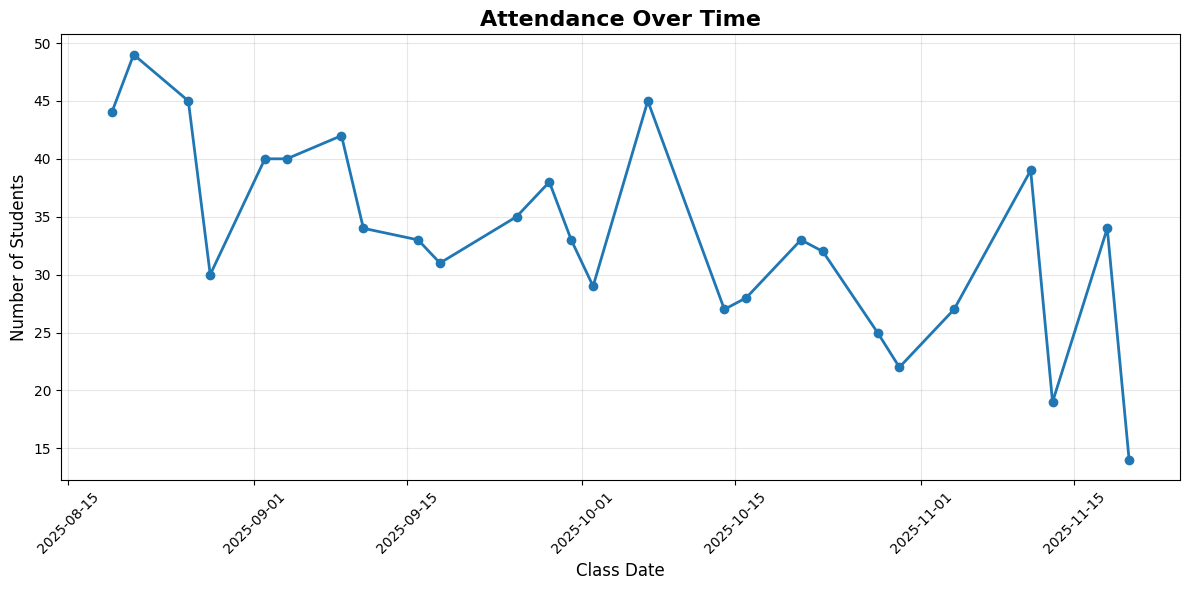

In [40]:
import matplotlib.pyplot as plt
# Plotting attendance over time
# Calculate attendance per date
attendance_by_date = combined_df.groupby('Class Date').size().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(attendance_by_date.index, attendance_by_date.values, marker='o', linestyle='-', linewidth=2)
plt.title('Attendance Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Class Date', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()